## Overfitting and underfitting 
- IMDB Dataset
- Overfitting 
    + baseline model
    + smaller model 
    + bigger model 
    + plot the trainig and validation loss
- Strategies
    + weight regularization 
    + dropout   

### Overfitting 
- Intuitively, a model with more parameters will have more **memorization capacity** 그래서 training set을 퍼펙하게 외워버림. 일반화시키는게 아니라. 이러면 unseen data인 test set에 대하여 모델이 아무 쓸모가 없음
- **Deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting**
- If you train for too long though, the model will start to overfit and learn patterns from the training data that don't generalize to the test data.

**Solution**
- more training data 
- regularization 
    + weight regularization 
    + dropout 

### Underfitting 
- model is not powerful enough, is over-regularized, or has simply not been trained long enough. This means the network has not learned the relevant patterns in the training data.

### Install packages

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.11.0


### Download the IMDB dataset 

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension)) #len(sequence)행, dimension열의 0행렬 
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 # 각 단어마다 one-hot encoding 
    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

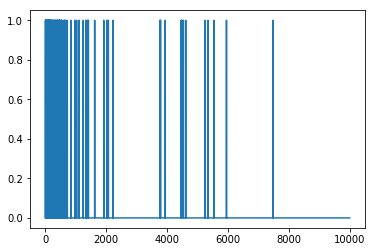

In [3]:
plt.plot(train_data[0]) #muliti-hot encoding 결과인데 0이 월등히 많으므로 plot이 아래와같이 나옴 

In [8]:
print(train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
print(train_data[0])

[0. 1. 1. ... 0. 0. 0.]


### Create a baseline model 

In [9]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), #16x10000 + 16x1
    keras.layers.Dense(16, activation=tf.nn.relu), #16x16 + 16x1
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #16x1 + 1
])

baseline_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [10]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                     verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.5023 - acc: 0.7966 - binary_crossentropy: 0.5023 - val_loss: 0.3480 - val_acc: 0.8709 - val_binary_crossentropy: 0.3480
Epoch 2/20
 - 8s - loss: 0.2574 - acc: 0.9096 - binary_crossentropy: 0.2574 - val_loss: 0.2863 - val_acc: 0.8865 - val_binary_crossentropy: 0.2863
Epoch 3/20
 - 7s - loss: 0.1888 - acc: 0.9334 - binary_crossentropy: 0.1888 - val_loss: 0.2871 - val_acc: 0.8854 - val_binary_crossentropy: 0.2871
Epoch 4/20
 - 8s - loss: 0.1503 - acc: 0.9489 - binary_crossentropy: 0.1503 - val_loss: 0.3087 - val_acc: 0.8789 - val_binary_crossentropy: 0.3087
Epoch 5/20
 - 8s - loss: 0.1228 - acc: 0.9591 - binary_crossentropy: 0.1228 - val_loss: 0.3335 - val_acc: 0.8744 - val_binary_crossentropy: 0.3335
Epoch 6/20
 - 7s - loss: 0.0998 - acc: 0.9692 - binary_crossentropy: 0.0998 - val_loss: 0.3641 - val_acc: 0.8707 - val_binary_crossentropy: 0.3641
Epoch 7/20
 - 7s - loss: 0.0799 - acc: 0.9772 - binary_crossentropy:

### Create a smaller model 
- less hidden units 

In [11]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)), # 4x10000 + 4x1
    keras.layers.Dense(4, activation=tf.nn.relu), # 4x4 + 4x1
    keras.layers.Dense(1, activation=tf.nn.sigmoid) #4x1 + 1
])

smaller_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [12]:
smaller_history = smaller_model.fit(train_data,
                                   train_labels,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(test_data, test_labels),
                                   verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 9s - loss: 0.6429 - acc: 0.6414 - binary_crossentropy: 0.6429 - val_loss: 0.5570 - val_acc: 0.7736 - val_binary_crossentropy: 0.5570
Epoch 2/20
 - 7s - loss: 0.4989 - acc: 0.8473 - binary_crossentropy: 0.4989 - val_loss: 0.4942 - val_acc: 0.8405 - val_binary_crossentropy: 0.4942
Epoch 3/20
 - 7s - loss: 0.4405 - acc: 0.8972 - binary_crossentropy: 0.4405 - val_loss: 0.4677 - val_acc: 0.8727 - val_binary_crossentropy: 0.4677
Epoch 4/20
 - 7s - loss: 0.4045 - acc: 0.9205 - binary_crossentropy: 0.4045 - val_loss: 0.4540 - val_acc: 0.8774 - val_binary_crossentropy: 0.4540
Epoch 5/20
 - 7s - loss: 0.3775 - acc: 0.9345 - binary_crossentropy: 0.3775 - val_loss: 0.4448 - val_acc: 0.8794 - val_binary_crossentropy: 0.4448
Epoch 6/20
 - 7s - loss: 0.3545 - acc: 0.9464 - binary_crossentropy: 0.3545 - val_loss: 0.4459 - val_acc: 0.8728 - val_binary_crossentropy: 0.4459
Epoch 7/20
 - 8s - loss: 0.3341 - acc: 0.9542 - binary_crossentropy:

### Create a bigger model 

In [13]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 14s - loss: 0.3533 - acc: 0.8447 - binary_crossentropy: 0.3533 - val_loss: 0.3049 - val_acc: 0.8768 - val_binary_crossentropy: 0.3049
Epoch 2/20
 - 12s - loss: 0.1399 - acc: 0.9490 - binary_crossentropy: 0.1399 - val_loss: 0.3566 - val_acc: 0.8622 - val_binary_crossentropy: 0.3566
Epoch 3/20
 - 13s - loss: 0.0454 - acc: 0.9877 - binary_crossentropy: 0.0454 - val_loss: 0.4228 - val_acc: 0.8703 - val_binary_crossentropy: 0.4228
Epoch 4/20
 - 14s - loss: 0.0068 - acc: 0.9992 - binary_crossentropy: 0.0068 - val_loss: 0.5723 - val_acc: 0.8702 - val_binary_crossentropy: 0.5723
Epoch 5/20
 - 14s - loss: 9.8448e-04 - acc: 1.0000 - binary_crossentropy: 9.8448e-04 - val_loss: 0.6662 - val_acc: 0.8722 - val_binary_crossentropy: 0.6662
Epoch 6/20
 - 14s - loss: 2.3313e-04 - acc: 1.0000 - binary_crossentropy: 2.3313e-04 - val_loss: 0.7075 - val_acc: 0.8715 - val_binary_crossentropy: 0.7075
Epoch 7/20
 - 15s - loss: 1.4271e-04 - acc: 1.

### Plot the training and validation loss 
- Solid line: training loss
- Dashed line: validation loss 
- **a lower validation loss indicates a better model**

<br>
the smaller network begins overfitting later than the baseline model (after 6 epochs rather than 4) and its performance degrades much more slowly once it starts overfitting.

<br> 

Notice that the larger network begins overfitting almost right away, after just one epoch, and overfits much more severely. The more capacity the network has, the quicker it will be able to model the training data (resulting in a low training loss), but the more susceptible it is to overfitting (resulting in a large difference between the training and validation loss).

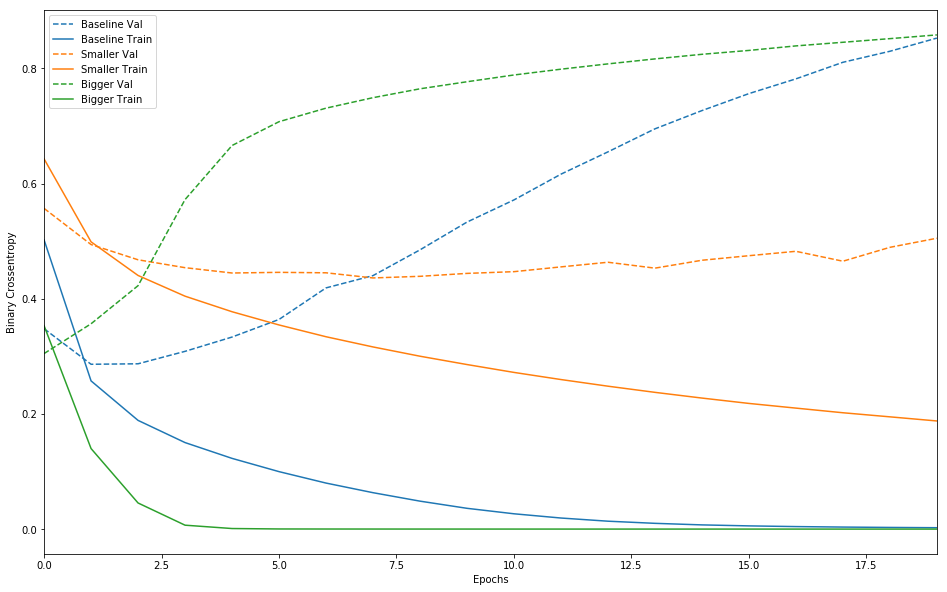

In [17]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                      '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                label=name.title()+' Train')
        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    
    plt.xlim([0, max(history.epoch)])
    
plot_history([('baseline', baseline_history),
             ('smaller', smaller_history),
             ('bigger', bigger_history)])

### Strategies
- Add weight regularization 


In [18]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5432 - acc: 0.7972 - binary_crossentropy: 0.5067 - val_loss: 0.3912 - val_acc: 0.8716 - val_binary_crossentropy: 0.3541
Epoch 2/20
 - 4s - loss: 0.3112 - acc: 0.9049 - binary_crossentropy: 0.2683 - val_loss: 0.3327 - val_acc: 0.8869 - val_binary_crossentropy: 0.2855
Epoch 3/20
 - 4s - loss: 0.2568 - acc: 0.9266 - binary_crossentropy: 0.2065 - val_loss: 0.3351 - val_acc: 0.8858 - val_binary_crossentropy: 0.2826
Epoch 4/20
 - 4s - loss: 0.2309 - acc: 0.9383 - binary_crossentropy: 0.1766 - val_loss: 0.3479 - val_acc: 0.8831 - val_binary_crossentropy: 0.2925
Epoch 5/20
 - 4s - loss: 0.2178 - acc: 0.9451 - binary_crossentropy: 0.1607 - val_loss: 0.3605 - val_acc: 0.8795 - val_binary_crossentropy: 0.3026
Epoch 6/20
 - 4s - loss: 0.2047 - acc: 0.9499 - binary_crossentropy: 0.1462 - val_loss: 0.3756 - val_acc: 0.8760 - val_binary_crossentropy: 0.3167
Epoch 7/20
 - 4s - loss: 0.1979 - acc: 0.9530 - binary_crossentropy:

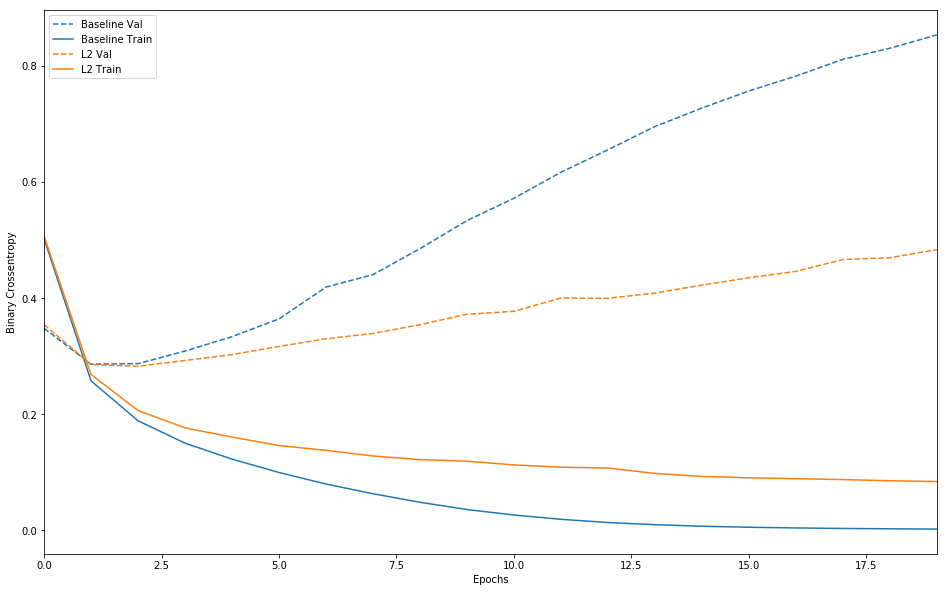

In [20]:
plot_history([('baseline', baseline_history),
             ('l2', l2_model_history)])

### Add dropout 

In [21]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(test_data, test_labels),
                                 verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 5s - loss: 0.6037 - acc: 0.6663 - binary_crossentropy: 0.6037 - val_loss: 0.4512 - val_acc: 0.8589 - val_binary_crossentropy: 0.4512
Epoch 2/20
 - 4s - loss: 0.4330 - acc: 0.8162 - binary_crossentropy: 0.4330 - val_loss: 0.3302 - val_acc: 0.8827 - val_binary_crossentropy: 0.3302
Epoch 3/20
 - 4s - loss: 0.3454 - acc: 0.8664 - binary_crossentropy: 0.3454 - val_loss: 0.2921 - val_acc: 0.8847 - val_binary_crossentropy: 0.2921
Epoch 4/20
 - 4s - loss: 0.2967 - acc: 0.8917 - binary_crossentropy: 0.2967 - val_loss: 0.2766 - val_acc: 0.8868 - val_binary_crossentropy: 0.2766
Epoch 5/20
 - 4s - loss: 0.2616 - acc: 0.9072 - binary_crossentropy: 0.2616 - val_loss: 0.2794 - val_acc: 0.8870 - val_binary_crossentropy: 0.2794
Epoch 6/20
 - 4s - loss: 0.2335 - acc: 0.9188 - binary_crossentropy: 0.2335 - val_loss: 0.2820 - val_acc: 0.8858 - val_binary_crossentropy: 0.2820
Epoch 7/20
 - 4s - loss: 0.2078 - acc: 0.9293 - binary_crossentropy:

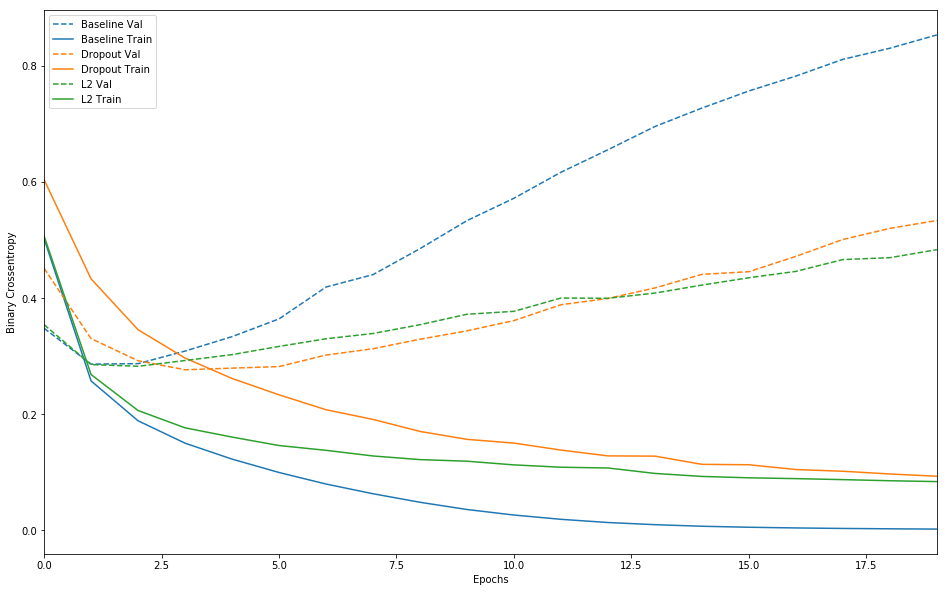

In [22]:
plot_history([('baseline', baseline_history),
             ('dropout', dpt_model_history),
             ('l2', l2_model_history)])